In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
 df = pd.read_csv("/content/drive/MyDrive/datasets/loan_status_prediction.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
pd.crosstab(df.Credit_History, df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.Gender.fillna(df.Gender.mode()[0],inplace=True)

In [ ]:
df.Married.fillna(df.Married.mode()[0],inplace=True)
df.Dependents.fillna(df.Dependents.mode()[0],inplace=True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0],inplace=True)
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace=True)

In [ ]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

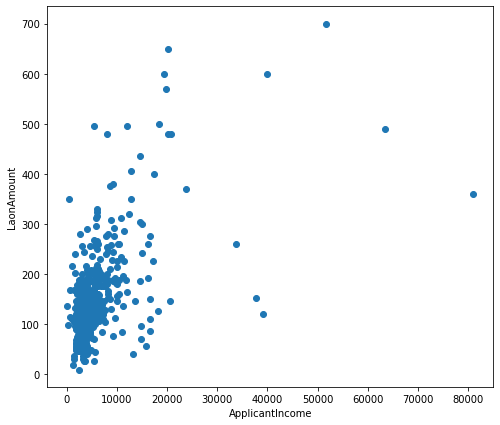

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(df.ApplicantIncome,df.LoanAmount)
plt.xlabel('ApplicantIncome')
plt.ylabel('LaonAmount')
plt.show()

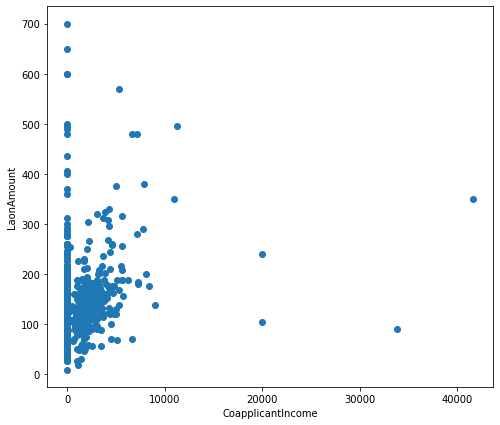

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(df.CoapplicantIncome,df.LoanAmount)
plt.xlabel('CoapplicantIncome')
plt.ylabel('LaonAmount')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


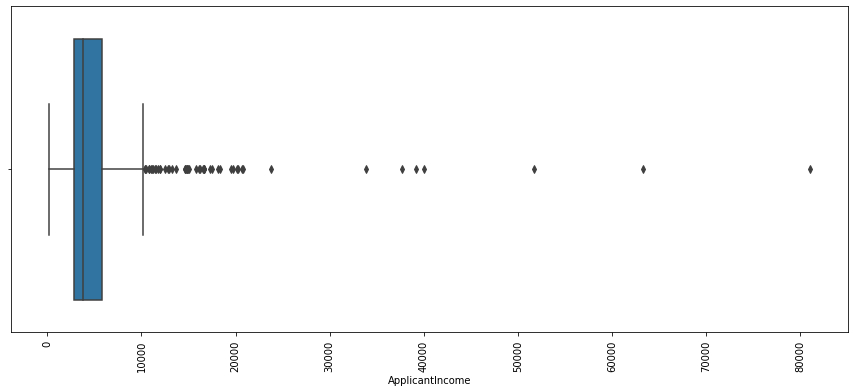

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


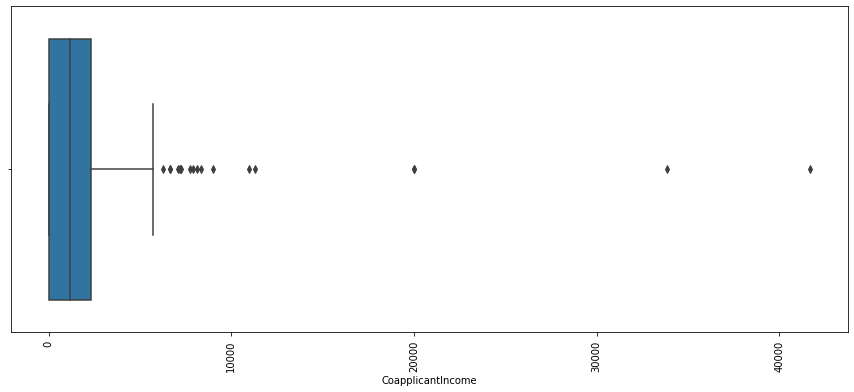

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


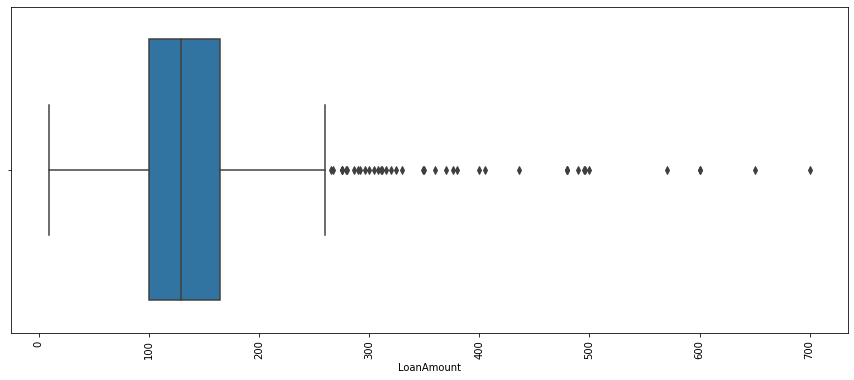

In [ ]:
data_c = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
for i  in data_c.columns:
  plt.figure(figsize=(15,6))
  sns.boxplot(data_c[i])
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
pd.crosstab(df.Credit_History, df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


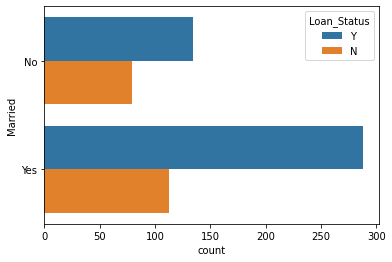

In [ ]:
sns.countplot(y='Married',hue='Loan_Status',data=df,)

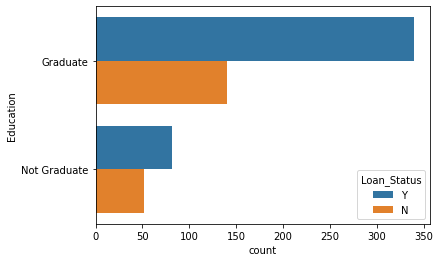

In [ ]:
sns.countplot(y='Education',hue='Loan_Status',data=df,)

In [ ]:
data_c = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [ ]:
le = LabelEncoder()

In [ ]:
for i in data_c:
  print(df[i].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [ ]:
for i in data_c:
  df[i] = le.fit_transform(df[i])

In [ ]:
for i in data_c:
  print(df[i].value_counts())

1    502
0    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
0    480
1    134
Name: Education, dtype: int64
0    532
1     82
Name: Self_Employed, dtype: int64
1    233
2    202
0    179
Name: Property_Area, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
correlation = df.corr()

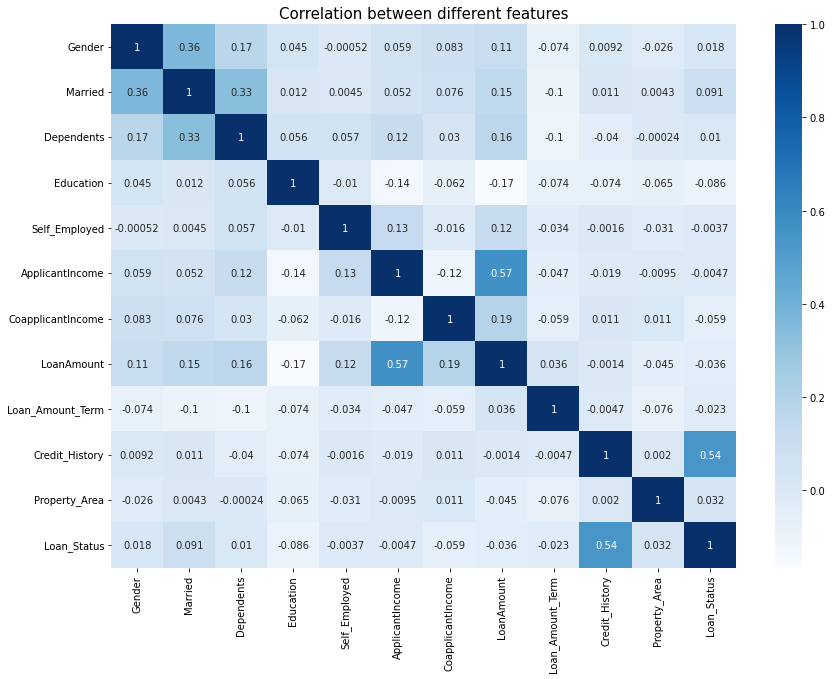

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
X = df.drop(columns=['Loan_ID','Loan_Status'])
y = df['Loan_Status']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [ ]:
rs = RobustScaler()

In [ ]:
X_train_scv = X_train.copy()

In [ ]:
X_test_scv = X_test.copy()

In [ ]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [ ]:
X_train_scv[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = rs.fit_transform(X_train_scv[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [ ]:
X_test_scv[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = rs.transform(X_test_scv[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [ ]:
X_train_scv.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
77,1,1,1,0,1,-0.971106,0.751689,-0.333333,0.0,1.0,2
89,1,1,0,0,0,0.683228,1.242948,0.750000,0.0,1.0,1
13,1,0,0,0,0,-0.670543,0.673603,-0.266667,0.0,1.0,0
180,1,1,1,0,0,0.931642,2.565698,0.833333,0.0,0.0,2
509,0,0,1,0,0,3.349542,-0.544889,-1.500000,0.0,1.0,2


In [ ]:
X_test_scv.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
414,0,1,0,1,0,-0.566244,0.843934,0.800000,0.0,0.0,1
569,1,1,0,0,0,-0.207893,0.340663,-0.433333,0.0,0.0,2
265,1,0,0,0,0,0.119450,0.934034,0.350000,0.0,1.0,0
84,1,1,1,0,0,0.081748,-0.544889,-1.333333,-120.0,1.0,2
109,1,1,3,1,0,-0.593728,-0.221388,-0.600000,120.0,1.0,1


In [ ]:
svc_classifier = SVC(kernel='rbf',gamma=0.4)

In [ ]:
svc_classifier.fit(X_train_scv,y_train)

SVC(gamma=0.4)

In [ ]:
y_predict = svc_classifier.predict(X_test_scv)

In [ ]:
y_predict = y_predict.reshape(-1,1)

In [ ]:
y_predict[:5]

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [ ]:
cm = confusion_matrix(y_test,y_predict)
print(cm)
accuracy_score(y_test,y_predict)

[[ 2 12]
 [ 3 45]]


0.7580645161290323

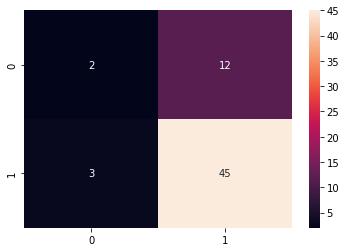

In [ ]:
sns.heatmap(cm,annot=True)